# Projeto Covid 19

## Digital Innovation One

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./data/covid_19_data.csv', parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
#Conferindo tipos de dados
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [4]:
import re 
def column_rename(col_name):
    return re.sub(r"[/ ]","", col_name).lower()

In [5]:
df.columns = [column_rename(col) for col in df.columns]

In [6]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# Análises

In [7]:
brasil = df.loc[df.countryregion == 'Brazil']
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
84,85,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306272,306273,2021-05-29,Roraima,Brazil,2021-05-30 04:20:55,103222.0,1635.0,96188.0
306290,306291,2021-05-29,Santa Catarina,Brazil,2021-05-30 04:20:55,965277.0,15174.0,921496.0
306292,306293,2021-05-29,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0
306298,306299,2021-05-29,Sergipe,Brazil,2021-05-30 04:20:55,233932.0,5054.0,208146.0


In [8]:
sp = brasil.loc[brasil.provincestate == 'Sao Paulo']
sp

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
27477,27478,2020-05-20,Sao Paulo,Brazil,2021-04-02 15:13:53,69859.0,5363.0,0.0
27933,27934,2020-05-21,Sao Paulo,Brazil,2021-04-02 15:13:53,73739.0,5558.0,0.0
28389,28390,2020-05-22,Sao Paulo,Brazil,2021-04-02 15:13:53,76871.0,5773.0,0.0
28845,28846,2020-05-23,Sao Paulo,Brazil,2021-04-02 15:13:53,80558.0,6045.0,0.0
29301,29302,2020-05-24,Sao Paulo,Brazil,2021-04-02 15:13:53,82161.0,6163.0,0.0
...,...,...,...,...,...,...,...,...
303232,303233,2021-05-25,Sao Paulo,Brazil,2021-05-26 04:20:35,3210204.0,108575.0,2875607.0
303997,303998,2021-05-26,Sao Paulo,Brazil,2021-05-27 04:20:59,3226875.0,109241.0,2875607.0
304762,304763,2021-05-27,Sao Paulo,Brazil,2021-05-28 04:20:36,3239657.0,109850.0,2893217.0
305527,305528,2021-05-28,Sao Paulo,Brazil,2021-05-29 04:20:41,3241240.0,110553.0,2895697.0


## Casos confirmados em São Paulo

In [9]:
px.line(sp, 'observationdate', 'confirmed',
        labels={'observationdate':'Data','confirmed':'Número de casos Confirmados'},
        title='Casos confirmados em São Paulo')

## Número de casos diários

In [10]:
sp['newcases'] = list(map(
    lambda x: 0 if (x==0) else sp['confirmed'].iloc[x] - sp['confirmed'].iloc[x-1],
    np.arange(sp.shape[0])
))

C:\Users\Aruka\AppData\Local\Temp\ipykernel_24256\3306658312.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
px.line(sp, x='observationdate', y='newcases',
        labels={'observationdate':'Data','newcases':'Casos Novos'}, 
        title='Novos casos diários')

## Mortes

In [12]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=sp.observationdate, y=sp.deaths,
              mode='lines', line={'color':'red'})
)
fig.update_layout(title='Mortes por COVID-19 em São Paulo')
fig.show()

## Taxa de Crescimento

In [13]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0] 

    #Define os pontos a ser avaliado
    n = (data_fim - data_inicio).days

    #Calcular a taxa
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100

In [14]:
#Taxa de crescimento do COVID em São Paulo em todo o período
taxa_crescimento(sp, 'confirmed')

1.0324148629897056

In [15]:
def taxa_crescimento_diario(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    data_fim = data.observationdate.max()

    #Define os pontos a ser avaliado
    n = (data_fim - data_inicio).days

    #Taxa calculada diariamente
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas) * 100

In [16]:
tx_dia = taxa_crescimento_diario(sp, 'confirmed')

In [17]:
primeiro_dia = sp.observationdate.loc[sp.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de Crescimento de Casos Confirmados em São Paulo')

## Predições

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [19]:
confirmados = sp.confirmed
confirmados.index = sp.observationdate
confirmados

observationdate
2020-05-20      69859.0
2020-05-21      73739.0
2020-05-22      76871.0
2020-05-23      80558.0
2020-05-24      82161.0
                ...    
2021-05-25    3210204.0
2021-05-26    3226875.0
2021-05-27    3239657.0
2021-05-28    3241240.0
2021-05-29    3254893.0
Name: confirmed, Length: 375, dtype: float64

In [20]:
res = seasonal_decompose(confirmados)

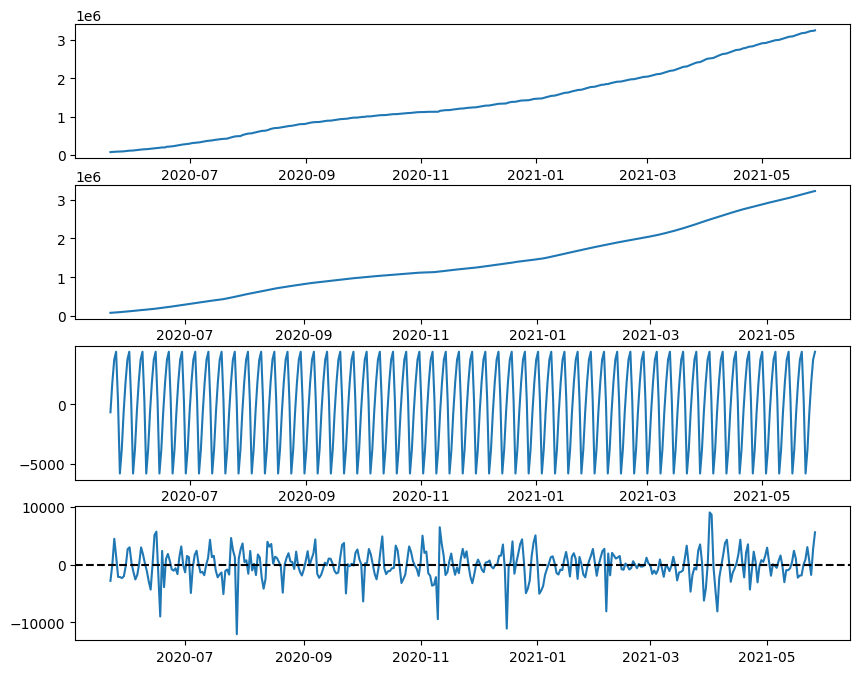

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index,res.resid)
ax4.axhline(0, linestyle='dashed', c='black')

## ARIMA

In [22]:
from pmdarima.arima import auto_arima

In [23]:
modelo = auto_arima(confirmados)
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name="Observed"
))
fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name="Predicted"
))  
fig.add_trace(go.Scatter(
    x=pd.date_range('2021-05-29','2021-07-31'),y=modelo.predict(62),name='Forecast'
))
fig.update_layout(title='Previsão de casos confirmados para os próximos 2 meses')
fig.show()